##### Text Classification

##### Dataset

Download `groceries.csv`

Location: https://mitu.co.in/dataset

Import the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import csv

load the dataset

In [5]:
df = pd.read_csv('datasets/SMSSpamCollection', sep='\t', names=['label', 'text'])
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [17]:
set([j for i in [j.split(' ') for i in df.values for j in i] for j in i])

{'',
 'PA',
 'Having',
 'prizesWith..',
 'least...Which',
 '2005.',
 'Save',
 'scotland.',
 'emergency',
 'occupied,',
 '9-6.',
 'boobs.',
 'facebook.',
 'tho!',
 'BANNEDUK',
 'visit',
 'rate)',
 'Hospital',
 'Jackpot!',
 'da:)he',
 'CHA',
 'plz.',
 'Thursday.',
 'about.',
 'Ron',
 'Sending',
 'Hols.',
 '12hours',
 'Txting',
 'reach',
 'wonder...',
 'sufficient',
 'Traditions....',
 'soup',
 'Din',
 'machines',
 'Hopefully',
 'racing',
 'Shuhui',
 'Every',
 'hey,',
 'o2.co.uk/games',
 'that..',
 'punch',
 'going,',
 'terms.',
 'treadmill',
 'closed,including',
 'wanting',
 'part.',
 'donate',
 'say!',
 'Neway',
 'toshiba...',
 '0800',
 'Thanx',
 'rent',
 'please?!',
 'ithink',
 'fidalfication?',
 'dedicate',
 'DRACULA',
 'reminded',
 'K..u',
 'taxt',
 'Moji',
 'colour',
 '08718720201',
 'do.Interested?',
 'us:)no',
 'vivek..',
 'Iriver',
 'DIDNT',
 'feels',
 'Usmle,',
 'boundaries.',
 'inviting',
 '80086',
 'deal:-)',
 'offer',
 'Use',
 'application',
 'A-ffectionate.',
 'fundamentals'

In [18]:
len(set([j for i in [j.split(' ') for i in df.values for j in i] for j in i]))

15694

##### Separate the input and output data

In [10]:
x = df['text']
y = df['label']

In [102]:
x.shape, y.shape

((5572,), (5572,))

Explore the data

<Axes: xlabel='label', ylabel='count'>

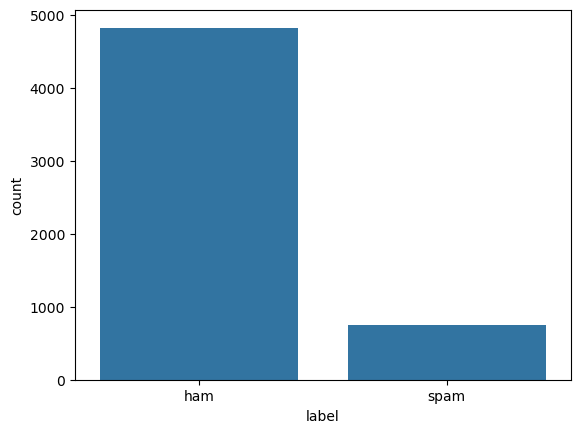

In [11]:
sns.countplot(x=y)

([<matplotlib.patches.Wedge at 0x19be7639dc0>,
 [Text(-1.0038714981945518, 0.4497132587689916, 'ham'),
  Text(1.0038714771419537, -0.44971330576360763, 'spam')],
 [Text(-0.5475662717424827, 0.24529814114672266, '86.59%'),
  Text(0.5475662602592474, -0.2452981667801496, '13.41%')])

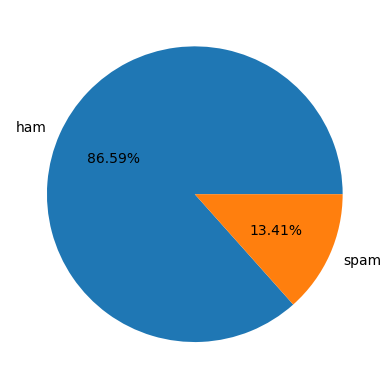

In [16]:
plt.pie(y.value_counts(), labels=y.value_counts().index, autopct='%.2f%%')

##### Install nltk

In [19]:
%pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [22]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')  # Tokenisation
nltk.download('stopwords')  # collection of stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rajesh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\rajesh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rajesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

##### Text Pre-processing

In [23]:
from nltk.tokenize import word_tokenize

In [25]:
sent = 'Hello friends! How are you? Welcome to the world of Python Programming.'
sent

'Hello friends! How are you? Welcome to the world of Python Programming.'

In [30]:
tokens1 = word_tokenize(sent)
tokens1

['Hello',
 'friends',
 '!',
 'How',
 'are',
 'you',
 '?',
 'Welcome',
 'to',
 'the',
 'world',
 'of',
 'Python',
 'Programming',
 '.']

In [34]:
tokens2 = []

for word in tokens1:
    if word.isalpha():
        tokens2.append(word)
tokens2

['Hello',
 'friends',
 'How',
 'are',
 'you',
 'Welcome',
 'to',
 'the',
 'world',
 'of',
 'Python',
 'Programming']

In [36]:
tokens2 = [word for word in tokens1 if word.isalpha()]
tokens2

['Hello',
 'friends',
 'How',
 'are',
 'you',
 'Welcome',
 'to',
 'the',
 'world',
 'of',
 'Python',
 'Programming']

In [40]:
# Remove stopwords
from nltk.corpus import stopwords
swords = stopwords.words('english')
swords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [46]:
tokens3 = [word for word in tokens2 if word not in swords]
tokens3

['Hello', 'friends', 'How', 'Welcome', 'world', 'Python', 'Programming']

In [47]:
tokens3 = []
for word in tokens2:
    if word.lower() not in swords:
        tokens3.append(word.lower())
tokens3

['hello', 'friends', 'welcome', 'world', 'python', 'programming']

In [48]:
tokens3 = [word.lower() for word in tokens2 if word.lower() not in swords]
tokens3

['hello', 'friends', 'welcome', 'world', 'python', 'programming']

In [49]:
def clean_text(sent):
    tokens1 = word_tokenize(sent)
    tokens2 = [word for word in tokens1 if word.isalpha()]
    tokens3 = [word.lower() for word in tokens2 if word.lower() not in swords]
    return tokens3

In [51]:
sent1 = 'It was not expected from them. They completed the wrong task.'
clean_text(sent1)

['expected', 'completed', 'wrong', 'task']

In [52]:
x.apply(clean_text)

0       [go, jurong, point, crazy, available, bugis, n...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, wkly, comp, win, fa, cup, final,...
3           [u, dun, say, early, hor, u, c, already, say]
4          [nah, think, goes, usf, lives, around, though]
                              ...                        
5567    [time, tried, contact, u, pound, prize, claim,...
5568                   [ü, b, going, esplanade, fr, home]
5569                            [pity, mood, suggestions]
5570    [guy, bitching, acted, like, interested, buyin...
5571                                   [rofl, true, name]
Name: text, Length: 5572, dtype: object

In [53]:
%pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [56]:
spam = x[y == 'spam']
ham = x[y == 'ham']

spam.shape, ham.shape

((747,), (4825,))

In [58]:
spam_messages = ' '.join(spam)
ham_messages = ' '.join(ham)

In [59]:
from wordcloud import WordCloud

In [65]:
wcloud = WordCloud(background_color='black').generate(text=spam_messages)

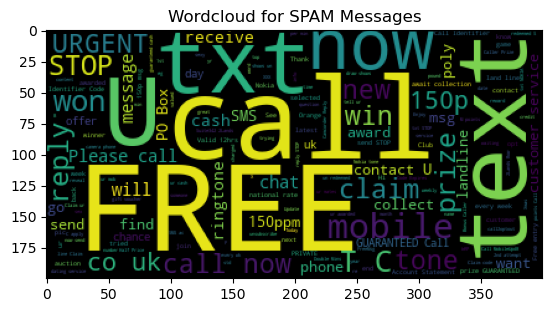

In [66]:
# plt.figure(figsize=(20, 20))
plt.title('Wordcloud for SPAM Messages')
plt.imshow(wcloud)

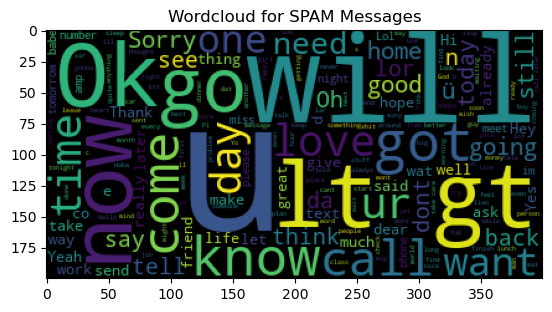

In [71]:
wcloud = WordCloud(background_color='black').generate(text=ham_messages)
plt.title('Wordcloud for SPAM Messages')
plt.imshow(wcloud)

##### TF*IDF Vectorisation

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [68]:
vectorizer = TfidfVectorizer(analyzer=clean_text)

In [69]:
x_new = vectorizer.fit_transform(x)
x_new.shape

(5572, 7217)

In [74]:
x_new.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [75]:
vectorizer.get_feature_names_out()

array(['aa', 'aah', 'aaniye', ..., 'zyada', 'é', 'ü'], dtype=object)

##### Cross-Validation

In [76]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_new, y, random_state=0)

In [80]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4179, 7217), (1393, 7217), (4179,), (1393,))

##### Build the model

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
rforest = RandomForestClassifier(n_estimators=20, random_state=0)

In [85]:
rforest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

##### Performance Evaluation

In [91]:
y_pred = rforest.predict(x_test)

In [92]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score

In [93]:
confusion_matrix(y_test, y_pred)

array([[1208,    0],
       [  33,  152]], dtype=int64)

In [94]:
accuracy_score(y_test, y_pred)

0.9763101220387652

In [95]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1208
        spam       1.00      0.82      0.90       185

    accuracy                           0.98      1393
   macro avg       0.99      0.91      0.94      1393
weighted avg       0.98      0.98      0.98      1393



##### Predict on unseen data

In [97]:
sent1 = 'Hello friends! How are you? Welcome to the world of Python Programming.'
sent2 = 'Hello! You won a chance to get free bonus of 2000!'

In [104]:
new = vectorizer.transform([sent1, sent2])
rforest.predict(new)

array(['ham', 'ham'], dtype=object)

In [112]:
df = pd.read_csv('datasets/sample.csv', sep='\r', names=['label'])
df

,label
0,Ok lar i double check wif da hair dresser alre...
1,"As a valued customer, I am pleased to advise y..."
2,"Today is ""song dedicated day.."" Which song wil..."


In [113]:
text = open('datasets/sample.csv').readlines()
text

['Ok lar i double check wif da hair dresser already he said wun cut v short. He said will cut until i look nice.,,\n',
 'As a valued customer, I am pleased to advise you that following recent review of your Mob No. you are awarded with a £1500 Bonus Prize, call 09066364589\n',
 '"Today is ""song dedicated day.."" Which song will u dedicate for me? Send this to all ur valuable frnds but first rply me...",,\n']

In [114]:
new = vectorizer.transform(text)
rforest.predict(new)

array(['ham', 'spam', 'ham'], dtype=object)

In [115]:
%pip install tensorflow keras

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [116]:
%

^C
Note: you may need to restart the kernel to use updated packages.
